# Groupby operations

Some imports:

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

pd.options.display.max_rows = 30

In [4]:
pip install ipykernel --upgrade

Requirement already up-to-date: ipykernel in c:\users\angela\anaconda3\lib\site-packages (5.4.3)
Note: you may need to restart the kernel to use updated packages.


## Recap: the groupby operation (split-apply-combine)

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

The example of the image in pandas syntax:

In [5]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


Using the filtering and reductions operations we have seen in the previous notebooks, we could do something like:


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

But pandas provides the `groupby` method to do this:

In [6]:
df.groupby('key').aggregate('sum')  # np.sum

,data
key,
A,15
B,30
C,45


In [7]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


Pandas does not only let you group by a column name. In `df.groupby(grouper)` can be many things:

- Series (or string indicating a column in df)
- function (to be applied on the index)
- dict : groups by values
- levels=[], names of levels in a MultiIndex



In [8]:
df.groupby(lambda x: x % 2).mean()

,data
0,10
1,10


## And now applying this on some real data

These exercises are based on the [PyCon tutorial of Brandon Rhodes](https://github.com/brandon-rhodes/pycon-pandas-tutorial/) (so all credit to him!) and the datasets he prepared for that. You can download these data from here: [`titles.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKajNMa1pfSzN6Q3M) and [`cast.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKal9UYTJSR2ZhSW8) and put them in the `/data` folder.

`cast` dataset: different roles played by actors/actresses in films

- title: title of the film
- name: name of the actor/actress
- type: actor/actress
- n: the order of the role (n=1: leading role)

In [9]:
cast = pd.read_csv('cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [10]:
titles = pd.read_csv('titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


<div class="alert alert-success">
    <b>EXERCISE</b>: Using groupby(), plot the number of films that have been released each decade in the history of cinema.
</div>

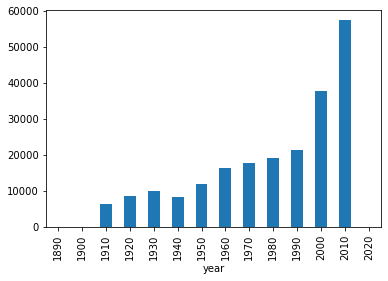

In [10]:
titles.groupby(titles.year //10*10).size().plot(kind="bar")

<div class="alert alert-success">
    <b>EXERCISE</b>: Use groupby() to plot the number of "Hamlet" films made each decade.
</div>

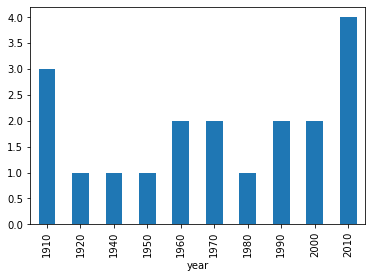

In [11]:
titles[titles["title"]=="Hamlet"].groupby(titles.year // 10 * 10).size().plot(kind="bar")

<div class="alert alert-success">
    <b>EXERCISE</b>: How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?
</div>

In [12]:
cast[(cast['year'] // 10 == 195) & (cast['n'] == 1)].groupby(['year','type']).size()

year  type   
1950  actor      604
      actress    271
1951  actor      633
      actress    272
1952  actor      591
                ... 
1957  actress    284
1958  actor      694
      actress    275
1959  actor      678
      actress    287
Length: 20, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.
</div>

In [13]:
cast[(cast['year'] >= 1990) & (cast['n'] == 1)].groupby('name').size().sort_values(ascending = False).head(10)

name
Mohanlal              126
Mammootty             118
Akshay Kumar           87
Jayaram                76
Andy Lau               72
Ajay Devgn             69
Eric Roberts           68
Amitabh Bachchan       68
Nagarjuna Akkineni     60
Dilip                  59
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Use groupby() to determine how many roles are listed for each of The Pink Panther movies.
</div>

In [14]:
cast[cast['title'] == 'The Pink Panther'].groupby('year')['n'].size()

year
1963    19
2006    89
Name: n, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: List, in order by year, each of the films in which Frank Oz has played more than 1 role.
</div>

In [15]:
cast

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
...,...,...,...,...,...,...
3333690,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24.0
3333691,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3333692,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3333693,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


In [16]:
role = cast[cast['name'] == 'Frank Oz'].groupby(['title','year']).size().sort_values(ascending = False)
role[role!=1]

title                                     year
The Muppet Movie                          1979    8
The Muppets Take Manhattan                1984    7
The Muppet Christmas Carol                1992    7
The Great Muppet Caper                    1981    6
Muppet Treasure Island                    1996    4
Muppets from Space                        1999    4
Sesame Street Presents: Follow that Bird  1985    3
The Adventures of Elmo in Grouchland      1999    3
An American Werewolf in London            1981    2
The Dark Crystal                          1982    2
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: List each of the characters that Frank Oz has portrayed at least twice.
</div>

In [17]:
character = cast[cast['name'] == 'Frank Oz'].groupby(['character']).size().sort_values(ascending = False)
character[character>=2]

character
Animal            6
Miss Piggy        6
Sam the Eagle     5
Yoda              5
Fozzie Bear       4
Bert              3
Cookie Monster    3
Grover            2
dtype: int64

## Transforms

Sometimes you don't want to aggregate the groups, but transform the values in each group. This can be achieved with `transform`:

In [18]:
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


In [19]:
df.groupby('key').transform('mean')

,data
0,5
1,10
2,15
3,5
4,10
5,15
6,5
7,10
8,15


In [20]:
def normalize(group):
    return (group - group.mean()) / group.std()

In [21]:
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


In [22]:
df.groupby('key').transform(normalize)

,data
0,-1.0
1,-1.0
2,-1.0
3,0.0
4,0.0
5,0.0
6,1.0
7,1.0
8,1.0


In [23]:
df.groupby('key').transform('sum')

,data
0,15
1,30
2,45
3,15
4,30
5,45
6,15
7,30
8,45


<div class="alert alert-success">
    <b>EXERCISE</b>: Add a column to the `cast` dataframe that indicates the number of roles for the film.
</div>

In [88]:
cast["Nuomero_ruoli"]=cast.groupby(["title"])["n"].transform(len)

In [89]:
cast

,title,year,name,type,character,n,Nuomero_ruoli
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0,24.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN,24.0
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0,47.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0,34.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN,34.0
...,...,...,...,...,...,...,...
3333690,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24.0,51.0
3333691,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0,35.0
3333692,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0,34.0
3333693,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0,26.0


<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the ratio of leading actor and actress roles to the total number of leading roles per decade.     
</div>

Tip: you can to do a groupby twice in two steps,  once calculating the numbers, and then the ratios.

In [90]:
cast[(cast['n']) == 1].groupby([cast['year'] // 10 * 10,cast['type']]).size() / cast[(cast['n']) == 1].groupby(cast['year'] // 10 * 10)['character'].size()


year  type   
1900  actor      0.833333
      actress    0.166667
1910  actor      0.466369
      actress    0.533631
1920  actor      0.598080
                   ...   
2000  actress    0.295464
2010  actor      0.700398
      actress    0.299602
2020  actor      0.750000
      actress    0.250000
Length: 26, dtype: float64

## Intermezzo: string manipulations

Python strings have a lot of useful methods available to manipulate or check the content of the string:

In [27]:
s = 'Bradwurst'

In [28]:
s.startswith('B')

True

In pandas, those methods (together with some additional methods) are also available for string Series through the `.str` accessor:

In [29]:
s = pd.Series(['Bradwurst', 'Kartoffelsalat', 'Sauerkraut'])

In [30]:
s.str.startswith('B')

0     True
1    False
2    False
dtype: bool

For an overview of all string methods, see: http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling

<div class="alert alert-success">
    <b>EXERCISE</b>: We already plotted the number of 'Hamlet' films released each decade, but not all titles are exactly called 'Hamlet'. Give an overview of the titles that contain 'Hamlet', and that start with 'Hamlet':
</div>

In [51]:
cast[cast["title"].str.startswith("Hamlet")]

,title,year,name,type,character,n
1456,Hamlet,1996,Riz Abbasi,actor,Attendant to Claudius,1.0
5803,"Hamlet, Prince of Denmark",1997,Ernest Abuba,actor,The King,NaN
6710,Hamlet,1921,Fritz Achterberg,actor,"Fortinbras,",9.0
10274,Hamlet,2009,Hayden Adams,actor,Laertes,7.0
10275,Hamlet,2009,Hayden Adams,actor,Player,7.0
...,...,...,...,...,...,...
3295995,Hamlet 2,2008,Margarita Wilder,actress,Julia De La Huerta,23.0
3304265,Hamlet,1996,Kate Winslet,actress,Ophelia,46.0
3327110,Hamlet 2,2008,Lydia Zazueta,actress,Audience Member,NaN
3330103,Hamlet's Ghost,2014,Stephanie Zimbalist,actress,Justina Keller,7.0


<div class="alert alert-success">
    <b>EXERCISE</b>: List the 10 movie titles with the longest name.
</div>

In [102]:
cast

,title,year,name,type,character,n,Nuomero_ruoli
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0,24.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN,24.0
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0,47.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0,34.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN,34.0
...,...,...,...,...,...,...,...
3333690,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24.0,51.0
3333691,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0,35.0
3333692,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0,34.0
3333693,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0,26.0


In [129]:
a = cast[["title"]]
a

,title
0,Suuri illusioni
1,Gangsta Rap: The Glockumentary
2,Menace II Society
3,Porndogs: The Adventures of Sadie
4,Stop Pepper Palmer
...,...
3333690,Stuttur Frakki
3333691,Foxtrot
3333692,Niceland (Population. 1.000.002)
3333693,U.S.S.S.S...


In [14]:
cast.title.str.len().sort_values(ascending=False).drop_duplicates()


1713325    208
2494269    196
511202     104
126737      99
2894529     94
          ... 
2647552      5
1327294      4
1613000      3
2853362      2
2354681      1
Name: title, Length: 97, dtype: int64

## Value counts

A useful shortcut to calculate the number of occurences of certain values is `value_counts` (this is somewhat equivalent to `df.groupby(key).size())`)

For example, what are the most occuring movie titles?

In [67]:
titles.title.value_counts().head()

Hamlet                  19
Macbeth                 14
Carmen                  14
The Three Musketeers    12
Maya                    11
Name: title, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Which years saw the most films released?
</div>

In [144]:
cast.year.value_counts().head(8)

2015    185339
2014    144950
2013    134359
2012    129510
2011    123650
2009    115896
2010    112351
2008     97789
Name: year, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of released films over time
</div>

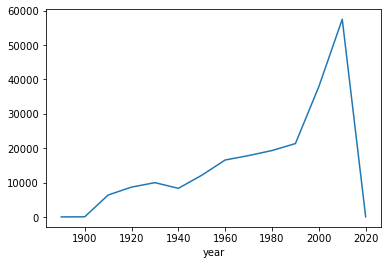

In [179]:
titles.groupby(titles.year //10*10).size().plot(kind="line")

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of "Hamlet" films made each decade.
</div>

In [ ]:
# %load snippets/04b - Advanced groupby operations36.py

<div class="alert alert-success">
    <b>EXERCISE</b>: What are the 11 most common character names in movie history?
</div>

In [182]:
cast.character.value_counts().head(11)

Himself        18928
Dancer         11070
Extra           9141
Reporter        7646
Doctor          6846
Policeman       6501
Student         6406
Bartender       6178
Nurse           6164
Party Guest     5917
Minor Role      5880
Name: character, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Which actors or actresses appeared in the most movies in the year 2010?
</div>

In [186]:
cast[cast["year"]==2010].groupby("name")["title"].size().sort_values(ascending=False).head(15)

name
Lloyd Kaufman           23
Suraaj Venjarammoodu    20
Jagathi Sreekumar       20
Chris (II) Eddy         20
Matt Simpson Siegel     17
Danny Trejo             17
Joe Estevez             15
Kyle Rea                15
Brahmanandam            15
Ben (II) Bishop         15
Salim Kumar             14
Michael Madsen          13
Debbie Rochon           13
Bijoy Mohanty           13
Jason (II) Roth         13
Name: title, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot how many roles Brad Pitt has played in each year of his career.
</div>

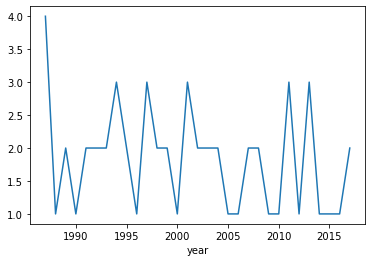

In [191]:
cast[cast["name"]== "Brad Pitt"].groupby("year").size().plot(kind="line")

<div class="alert alert-success">
    <b>EXERCISE</b>: What are the 10 most film titles roles that start with the word "The Life"?
</div>

In [13]:
cast[cast['title'].str.startswith('The Life')].groupby(['title','character']).size().sort_values(ascending=False).head(10)

title                                     character                  
The Life Aquatic with Steve Zissou        Pirate                         17
The Life and Hard Times of Guy Terrifico  Himself                        13
The Life of David Gale                    TV Reporter                    12
The Life and Times of Judge Roy Bean      Outlaw                          9
The Life Aquatic with Steve Zissou        University of Alaska Intern     8
The Life of David Gale                    Interviewee                     7
The Life Exchange                         Halloween Party Attendee        7
The Life of David Gale                    College Student                 6
The Life Aquatic with Steve Zissou        Hennessey Sailor                5
The Life of David Gale                    Protestor                       4
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s? And in 2000s?
</div>

In [12]:
cast[(cast["n"] == 1) & (cast["year"]>= 1950) & (cast["year"]<= 1959)].groupby("type").size()

type
actor      6388
actress    2813
dtype: int64

In [ ]:
# %load snippets/04b - Advanced groupby operations42.py